In [1]:
import cv2
import numpy as np
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt


In [2]:
png_paths = [
    r"C:\Users\lakho\Desktop\URECA\Whole Slide Images .svs\WSI 1 Tiles\132_100.png",
    r"C:\Users\lakho\Desktop\URECA\Whole Slide Images .svs\WSI 1 Tiles\132_105.png",
    r"C:\Users\lakho\Desktop\URECA\Whole Slide Images .svs\WSI 1 Tiles\132_117.png",
    r"C:\Users\lakho\Desktop\URECA\Whole Slide Images .svs\WSI 1 Tiles\132_126.png",
    r"C:\Users\lakho\Desktop\URECA\Whole Slide Images .svs\WSI 1 Tiles\132_127.png"
]

# Parameters for DBSCAN
eps = 10
min_samples = 20


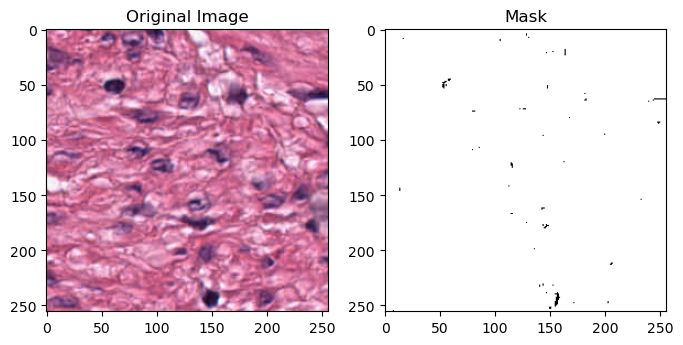

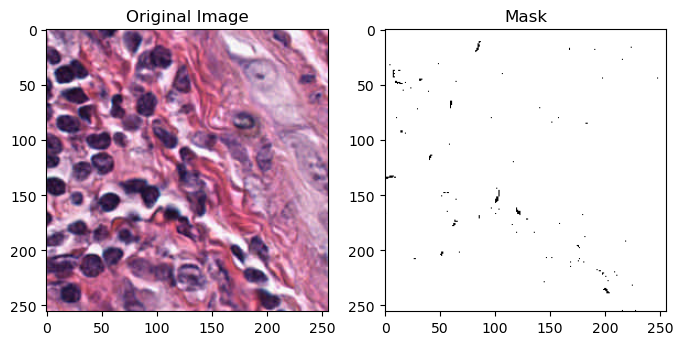

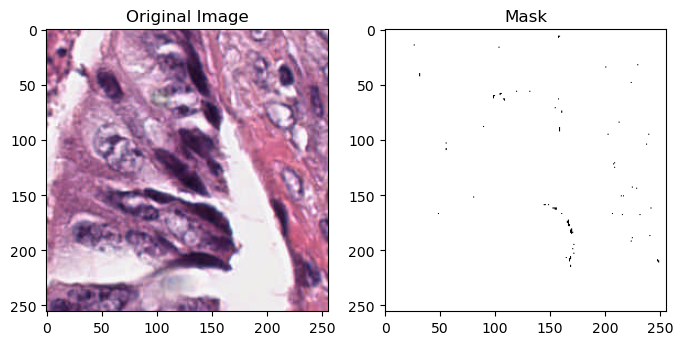

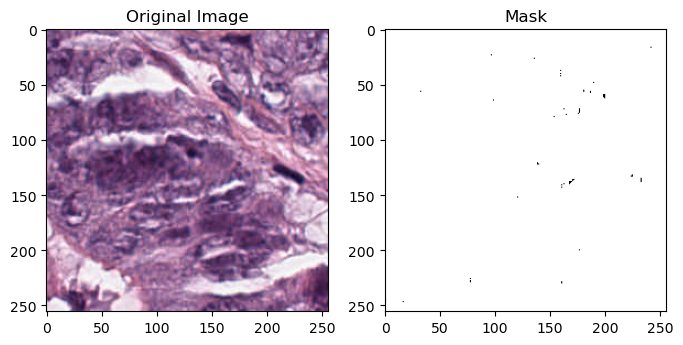

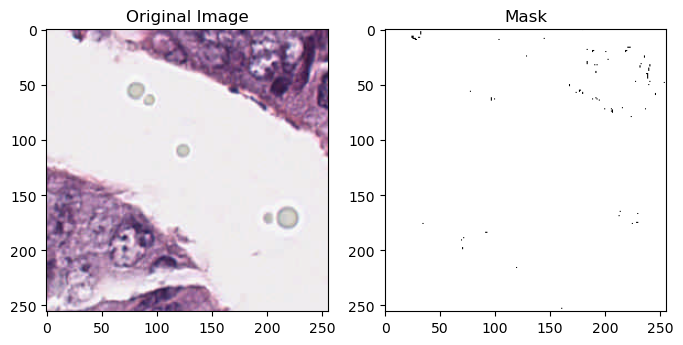

In [4]:
for path in png_paths:
    # Load image
    image = cv2.imread(path)
    # Resize to reduce computational load (optional, depending on original size)
    image_resized = cv2.resize(image, (256, 256))
    
    # Convert to a feature space, e.g., color
    image_flattened = image_resized.reshape(-1, 3)  # RGB channels as features
    
    # Run DBSCAN
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(image_flattened)
    labels = db.labels_.reshape(image_resized.shape[:2])
    
    # Mask creation based on clusters (ignoring noise points labeled as -1)
    mask = np.zeros_like(labels)
    mask[labels != -1] = 255  # Clustered regions as mask
    
    # Display the mask for verification
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 2, 2)
    plt.title("Mask")
    plt.imshow(mask, cmap="gray")
    plt.show()
